# Water Rights Restored to the Gila River

The impacts of irrigation on vegetation health in the Gila River Valley

Elsa Culler  
Nate Quarderer  
2025-07-09

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r 

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [3]:
# Import libraries
import json
from glob import glob
import pandas as pd
import hvplot.pandas
import geopandas as gpd
import holoviews as hv
import earthpy
import hvplot.xarray
import rioxarray as rxr
import xarray as xr
import multiprocessing
multiprocessing.cpu_count()

2

# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from before the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span> (<span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span> to <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from after the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="4"></span> (<span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="5"></span> to <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="6"></span>)</li>
<li>Subtract the pre-event data <strong>from</strong> the post-event
data</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="7"></span> boundary to the plot.</p></div></div>

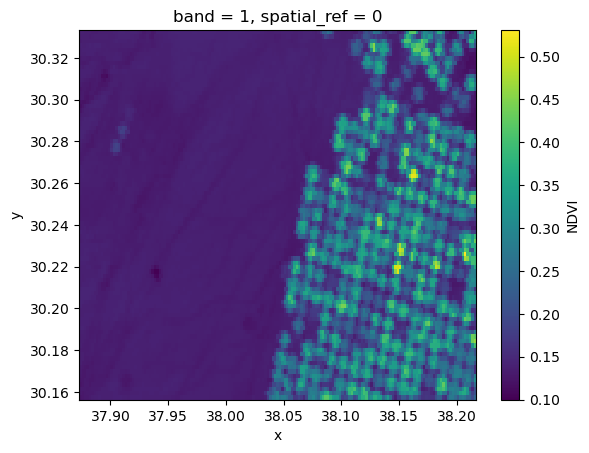

In [10]:
#plot before
pre_ndvi = (
    annaul_ndvi_da #call out variable
    .sel(date=slice('2001', '2012'))
    .mean(dim = 'date')
    .NDVI
)
pre_ndvi.plot()

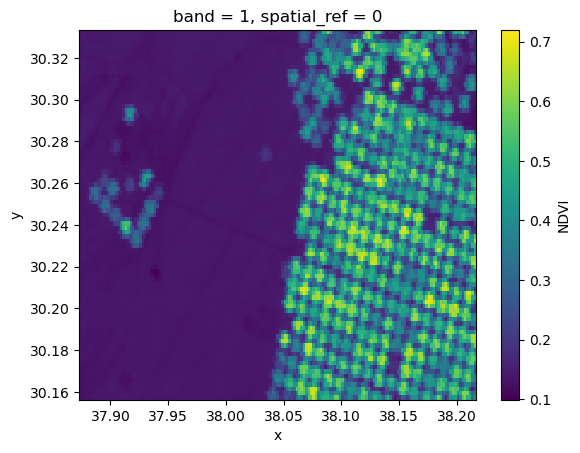

In [11]:
#plot after
post_ndvi = (
    annaul_ndvi_da #call out variable
    .sel(date=slice('2013', '2025'))
    .mean(dim = 'date')
    .NDVI
)
post_ndvi.plot()

In [20]:
#plot Difference
ndvi_diff = post_ndvi-pre_ndvi
ndvi_diff_plot=(
    ndvi_diff.hvplot(x='x', y='y', cmap = 'PiYG', geo=True, 
                     title='Difference in NDVI 2013-2025 vs 2001-2012' )
    *
    boundary_gdf.hvplot(geo=True, line_color='black')
)
hv.save(ndvi_diff_plot, 'Tuburjal_NDVI_Difference.html')
ndvi_diff_plot

:Overlay
   .Image.I :Image   [x,y]   (NDVI)
   .Path.I  :Path   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!